In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Pre processing

**Reading the dataset**

In [3]:
dt_baseball = pd.read_csv('mlbbat10.csv')

*Investigating the number of columns and elements that the table has. Which is 1199 elements (players) with 19 columns*

In [4]:
dt_baseball.shape

(1199, 19)

*Initially it will be analyzed which are the columns that the dataset has:*

In [5]:
dt_baseball.columns

Index(['name', 'team', 'position', 'game', 'at_bat', 'run', 'hit', 'double',
       'triple', 'home_run', 'rbi', 'total_base', 'walk', 'strike_out',
       'stolen_base', 'caught_stealing', 'obp', 'slg', 'bat_avg'],
      dtype='object')

*If you don't understand baseball that's fine, i'll help you understand what each column means.*



*   **name** : the name of the player
*   **team** : the player's team
*   **position** : the player's position
*   **game** : how many games did he play
*   **at_bat** : the number of times the player had time at bat against a pitcher
*   **run** : is the number of runs the player has made safely around 3 bases and back safely before 3 outs are made.
*   **hit** : how many times did the player reach safety after hitting the ball
*   **double** : how many times did the player hit the pitched ball and safely reached second base
*   **triple** : how many times did the player hit the ball and reached third base, without the help of an intervening error or attempt to put out another baserunner.
*   **home run** : how many times the player did hit the ball and was able to circle the bases and reach home plate safely.
*   **rbi** : is how many times the player who did the batter made a play the allowed a run to be scored.
*   **total_base** : how many bases the player gained with hits.
*   **walk** : how many times the player (batter) received four piches during a plate appearance.
*   **strike_out** : how many times the player recieve three strikes during a time at the bat.
*   **stolen_base** : how many times the player made a stolen base, which is when the player advances to a base.
*   **caught_stealing** : how many times the player was caught stealing, which is when the runner attempts to advance from one to another without the ball being batted and is tagged out by other player (fielder).
*   **obp** : it is called ob base percentage, and is how frequently a batter reaches base per plate appearance.
*   **slg** : it is called slugging percentage, and represents the total number of bases a player records per at bat.
*   **bat_avg** : players hits by total at bats, measures the perfomance of batters.





What types of data does each column have?

In [6]:
dt_baseball.dtypes

name                object
team                object
position            object
game                 int64
at_bat               int64
run                  int64
hit                  int64
double               int64
triple               int64
home_run             int64
rbi                  int64
total_base           int64
walk                 int64
strike_out           int64
stolen_base          int64
caught_stealing      int64
obp                float64
slg                float64
bat_avg            float64
dtype: object

Let's analyze whether there is missing data in the table so that the statistics are not wrong.

In [7]:
pd.isna(dt_baseball).any()

name               False
team               False
position           False
game               False
at_bat             False
run                False
hit                False
double             False
triple             False
home_run           False
rbi                False
total_base         False
walk               False
strike_out         False
stolen_base        False
caught_stealing    False
obp                False
slg                False
bat_avg            False
dtype: bool

Checking if there are players who do not have a specific position.

In [8]:
dt_baseball.loc[dt_baseball['position'].isna()]

,name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg


Creating new columns for game proportion scores

In [9]:
dt_baseball["home_per_game"] = dt_baseball["home_run"] / dt_baseball["game"]
dt_baseball["rbi_per_game"] = dt_baseball["rbi"] / dt_baseball["game"]
dt_baseball["strike_out_per_bat"] = dt_baseball["strike_out"] / dt_baseball["at_bat"]

### Initial data analysis

*The first 5 elements of the dataset are:*

In [10]:
dt_baseball.head()

,name,team,position,game,at_bat,run,hit,double,triple,home_run,...,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,...,45,86,42,9,0.359,0.394,0.315,0.037037,0.265432,0.126471
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,...,63,106,18,5,0.340,0.370,0.270,0.063694,0.426752,0.159879
2,M Young,TEX,3B,157,656,99,186,36,3,21,...,50,115,4,2,0.330,0.444,0.284,0.133758,0.579618,0.175305
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,...,45,47,68,18,0.341,0.316,0.275,0.006250,0.293750,0.072197
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,...,76,184,11,4,0.366,0.464,0.269,0.181250,0.518750,0.282642


*I'm a New York Yankees fan, so I'm going to show you all the players from that team*



In [11]:
dt_baseball[dt_baseball['team']=='NYY']['name']

1             D Jeter
8              R Cano
20         M Teixeira
58          N Swisher
92        A Rodriguez
122         B Gardner
131      C Granderson
167          A Kearns
182          J Posada
268        F Cervelli
315          M Thames
374            R Pena
427         L Berkman
472         N Johnson
488         J Miranda
506            R Winn
510          C Curtis
552           E Nunez
555           K Russo
666          G Golson
690         C Huffman
709         C Moeller
792        C Sabathia
811        A Pettitte
903         A Burnett
930          P Hughes
953          M Rivera
967         J Vazquez
971          A Aceves
1010    J Chamberlain
1042         C Gaudin
1079          B Logan
1090          D Marte
1101          S Mitre
1109           I Nova
1120           C Park
1145      D Robertson
Name: name, dtype: object

The first player of the dataset is:

In [12]:
dt_baseball.iloc[0]

name                  I Suzuki
team                       SEA
position                    OF
game                       162
at_bat                     680
run                         74
hit                        214
double                      30
triple                       3
home_run                     6
rbi                         43
total_base                 268
walk                        45
strike_out                  86
stolen_base                 42
caught_stealing              9
obp                      0.359
slg                      0.394
bat_avg                  0.315
home_per_game         0.037037
rbi_per_game          0.265432
strike_out_per_bat    0.126471
Name: 0, dtype: object

If you want to know which player is the one who have the id 10

In [13]:
dt_baseball.loc[10:10, 'team']

10    MIL
Name: team, dtype: object

Showing you only the players, which team they play for and in which position.

In [14]:
dt_baseball.loc[0:, ['name', 'team', 'position']]

,name,team,position
0,I Suzuki,SEA,OF
1,D Jeter,NYY,SS
2,M Young,TEX,3B
3,J Pierre,CWS,OF
4,R Weeks,MIL,2B
...,...,...,...
1194,B Wood,KC,P
1195,M Wuertz,OAK,P
1196,M Zagurski,PHI,P
1197,B Ziegler,OAK,P


One of the most importants plays in baseball is hits, so let's see who are the main players who participated in these

In [15]:
dt_baseball.loc[dt_baseball["hit"].sort_values(ascending=False).index].head(12)

,name,team,position,game,at_bat,run,hit,double,triple,home_run,...,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,...,45,86,42,9,0.359,0.394,0.315,0.037037,0.265432,0.126471
8,R Cano,NYY,2B,160,626,103,200,41,3,29,...,57,77,3,2,0.381,0.534,0.319,0.181250,0.681250,0.123003
34,C Gonzalez,COL,OF,145,587,111,197,34,9,34,...,40,135,26,8,0.376,0.598,0.336,0.234483,0.806897,0.229983
24,B Butler,KC,1B,158,595,77,189,45,0,15,...,69,78,0,0,0.388,0.469,0.318,0.094937,0.493671,0.131092
30,A Beltre,BOS,3B,154,589,84,189,49,2,28,...,40,82,2,1,0.365,0.553,0.321,0.181818,0.662338,0.139219
10,R Braun,MIL,OF,157,619,101,188,45,1,25,...,56,105,14,3,0.365,0.501,0.304,0.159236,0.656051,0.169628
6,N Markakis,BAL,OF,160,629,79,187,45,3,12,...,73,93,7,2,0.370,0.436,0.297,0.075000,0.375000,0.147854
2,M Young,TEX,3B,157,656,99,186,36,3,21,...,50,115,4,2,0.330,0.444,0.284,0.133758,0.579618,0.175305
95,J Hamilton,TEX,OF,133,518,95,186,40,3,32,...,43,95,8,1,0.411,0.633,0.359,0.240602,0.751880,0.183398
23,M Holliday,STL,OF,158,596,95,186,45,1,28,...,69,93,9,5,0.390,0.532,0.312,0.177215,0.651899,0.156040


One of the most important plays in baseball is the home run, so let's find out the statistics in the table about this play

In [16]:
dt_baseball.home_run.describe()

count    1199.000000
mean        3.847373
std         7.372345
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        54.000000
Name: home_run, dtype: float64

What positions are the ones that hit the most home runs?

In [17]:
dt_baseball.loc[dt_baseball["hit"]]["position"].value_counts()

position
OF    692
SS    150
2B    129
3B    110
1B     84
C      20
DH     14
Name: count, dtype: int64

What was the average number of games that the league's players played?

In [18]:
float(dt_baseball.game.mean())

50.534612176814015

Which teams have the most players? And which teams have the fewest players in this database?

In [19]:
dt_baseball.team.value_counts()

team
FLA    53
NYM    47
PIT    46
ARI    45
WSH    45
HOU    44
COL    44
LAD    44
CIN    43
ATL    42
BOS    42
STL    41
SD     41
SEA    40
SF     40
MIL    40
PHI    39
CHC    39
LAA    38
NYY    37
TEX    37
BAL    36
DET    36
MIN    36
OAK    36
CLE    35
TOR    34
TB     34
KC     33
CWS    32
Name: count, dtype: int64

Strike outs are statistics that reveal the pitcher's dominance and the batsman's incompetence, so let's analyze the players who have the most strike outs and are in the pitcher position.

In [20]:
dt_baseball.loc[dt_baseball["position"]=="P"][["name", "strike_out"]].sort_values(by="strike_out", ascending=False)

,name,strike_out
449,R Halladay,42
487,R Lopez,35
483,M Cain,33
525,P Maholm,31
479,B Arroyo,31
...,...,...
1191,R Williams,0
1192,K Wood,0
1193,T Wood,0
1194,B Wood,0


Another very popular team is the Los Angeles Dodgers, let's see their players.

In [21]:
dt_baseball.loc[dt_baseball.team.map(lambda team : team == 'LAD')].name

19             M Kemp
33            J Loney
38          R Theriot
98           A Ethier
104           C Blake
181          R Furcal
202         J Carroll
218          R Martin
234         R Barajas
323         R Johnson
330         M Ramirez
362        R Belliard
373        G Anderson
380       S Podsednik
395          J Castro
406            X Paul
423           A Ellis
469         J Gibbons
490          B Ausmus
495     C Billingsley
529         C Kershaw
530          H Kuroda
538           T Lilly
574        R Mitchell
637             J Ely
648         V Padilla
667              C Hu
668         T Oeltjen
710     C Monasterios
721         J Lindsey
771          C Haeger
794          J Weaver
886        R Troncoso
932          K Jansen
934             H Kuo
959     T Schlichting
984       R Belisario
998         J Broxton
1028         S Elbert
1078           J Link
1100         J Miller
1118          R Ortiz
1160       G Sherrill
1179       J Taschner
Name: name, dtype: object

Stolen base is one of the important defensive plays, let's check which players have the highest number of stolen bases

In [22]:
dt_baseball.loc[dt_baseball["stolen_base"]][["name", "stolen_base"]].sort_values(by="stolen_base", ascending=False)

,name,stolen_base
3,J Pierre,68
3,J Pierre,68
3,J Pierre,68
3,J Pierre,68
3,J Pierre,68
...,...,...
28,A Gonzalez,0
20,M Teixeira,0
24,B Butler,0
20,M Teixeira,0


What positions had the fewest home runs?

In [23]:
dt_baseball.groupby('position').home_run.count().sort_values()

position
-       8
DH     25
1B     69
3B     71
SS     71
2B     72
C     113
OF    226
P     544
Name: home_run, dtype: int64

How many home runs did each team hit?

In [24]:
dt_baseball.groupby('team').home_run.count()

team
ARI    45
ATL    42
BAL    36
BOS    42
CHC    39
CIN    43
CLE    35
COL    44
CWS    32
DET    36
FLA    53
HOU    44
KC     33
LAA    38
LAD    44
MIL    40
MIN    36
NYM    47
NYY    37
OAK    36
PHI    39
PIT    46
SD     41
SEA    40
SF     40
STL    41
TB     34
TEX    37
TOR    34
WSH    45
Name: home_run, dtype: int64

Which player had the most home runs?



In [25]:
dt_baseball.loc[(dt_baseball.home_run.idxmax()), 'name']

'J Bautista'

Who had the most home runs on each team?

In [26]:
dt_baseball.loc[(dt_baseball.groupby('team').home_run.idxmax()), ('name', 'home_run', 'team')].sort_values(by='home_run')

,name,home_run,team
68,Y Betancourt,16,KC
71,K Kouzmanoff,16,OAK
27,G Jones,21,PIT
120,B McCann,21,ATL
73,S Choo,22,CLE
185,R Branyan,25,SEA
13,H Pence,25,HOU
133,A Ramirez,25,CHC
262,J Thome,25,MIN
138,M Napoli,26,LAA


I want to know which player on each team had the most strike outs

In [27]:
dt_baseball.loc[dt_baseball.groupby("team")["strike_out"].idxmax()]

,name,team,position,game,at_bat,run,hit,double,triple,home_run,...,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
110,M Reynolds,ARI,3B,145,499,79,99,17,2,32,...,83,211,7,4,0.320,0.433,0.198,0.220690,0.586207,0.422846
77,D Lee,ATL,1B,148,547,80,142,35,0,19,...,73,134,1,3,0.347,0.428,0.260,0.128378,0.540541,0.244973
42,A Jones,BAL,OF,149,581,76,165,25,5,19,...,23,119,7,7,0.325,0.442,0.284,0.127517,0.463087,0.204819
97,D Ortiz,BOS,DH,145,518,86,140,36,1,32,...,82,145,0,1,0.370,0.529,0.270,0.220690,0.703448,0.279923
112,A Soriano,CHC,OF,147,496,67,128,40,3,24,...,45,123,5,1,0.322,0.496,0.258,0.163265,0.537415,0.247984
101,D Stubbs,CIN,OF,150,514,91,131,19,6,22,...,55,168,30,6,0.329,0.444,0.255,0.146667,0.513333,0.326848
73,S Choo,CLE,OF,144,550,81,165,31,2,22,...,83,118,22,7,0.401,0.484,0.300,0.152778,0.625000,0.214545
34,C Gonzalez,COL,OF,145,587,111,197,34,9,34,...,40,135,26,8,0.376,0.598,0.336,0.234483,0.806897,0.229983
76,P Konerko,CWS,1B,149,548,89,171,30,1,39,...,72,110,0,1,0.393,0.584,0.312,0.261745,0.744966,0.200730
11,A Jackson,DET,OF,151,618,103,181,34,10,4,...,47,170,27,6,0.345,0.400,0.293,0.026490,0.271523,0.275081


**Descriptive statistics of the features**

In [28]:
#numeric variables
dt_baseball.describe()

,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,970.000000
mean,50.534612,137.909091,17.771476,35.491243,7.077565,0.722269,3.847373,16.920767,55.555463,13.159299,28.612177,2.46789,0.941618,0.205531,0.237613,0.159374,0.040979,0.191135,0.306559
std,49.544371,188.126913,27.051262,51.908498,10.812941,1.601990,7.372345,26.636637,83.717936,20.737459,38.441364,6.48013,2.161646,0.173192,0.236077,0.144587,0.069254,0.218384,0.230822
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170847
50%,31.000000,37.000000,3.000000,6.000000,1.000000,0.000000,0.000000,2.000000,8.000000,2.000000,10.000000,0.00000,0.000000,0.255000,0.273000,0.195000,0.000000,0.117647,0.243117
75%,84.000000,225.000000,26.500000,56.000000,11.000000,1.000000,4.000000,25.000000,82.500000,20.000000,44.000000,1.00000,1.000000,0.324000,0.394000,0.259000,0.066987,0.333333,0.357942
max,162.000000,680.000000,115.000000,214.000000,49.000000,14.000000,54.000000,126.000000,351.000000,114.000000,211.000000,68.00000,18.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000


The first detail observed is that all columns except **strike_out_per_bar** have 1199 elements. When investigating the possible reason for the missing values ​​in this column, I noticed that these values ​​were NaN. Therefore, I checked if it could be due to the presence of 0 values ​​in the **at_bat** column, which, when dividing strike_out/at_bat, would result in NaN, since division by 0 is undefined.

This hypothesis proved to be correct, as evidenced by the results of the code below.

In [29]:
at_bat_zero = (dt_baseball["at_bat"] == 0).sum()
strike_bats_na = (dt_baseball["strike_out_per_bat"].isna()).sum()

print(f"The number of zero values ​​in the at_bat column is: {at_bat_zero}")

print(f"The number of results from dividing strike_out/at_bat that resulted in NaN were: {strike_bats_na}")

The number of zero values ​​in the at_bat column is: 229
The number of results from dividing strike_out/at_bat that resulted in NaN were: 229


Regarding the average features, each one was used to find the players who stand out the most, whether in relation to all players, players on the same team, or the player's position. All the conclusions of this analysis are in the **General Player Analysis** section of this notebook.

In [30]:
#categorical variables
dt_baseball.describe(include='object')

,name,team,position
count,1199,1199,1199
unique,1120,30,9
top,A Gonzalez,FLA,P
freq,4,53,544


### General Player Analysis

The 12 players with the most game appearances are:

In [31]:
dt_baseball.loc[dt_baseball["game"].sort_values(ascending=False).head(12).index]

,name,team,position,game,at_bat,run,hit,double,triple,home_run,...,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
19,M Kemp,LAD,OF,162,602,82,150,25,6,28,...,53,170,19,15,0.310,0.450,0.249,0.172840,0.549383,0.282392
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,...,45,86,42,9,0.359,0.394,0.315,0.037037,0.265432,0.126471
18,C Figgins,SEA,2B,161,602,62,156,21,2,1,...,74,114,42,15,0.340,0.306,0.259,0.006211,0.217391,0.189369
53,J Bautista,TOR,OF,161,569,109,148,35,3,54,...,100,116,9,2,0.378,0.617,0.260,0.335404,0.770186,0.203866
46,P Fielder,MIL,1B,161,578,94,151,25,0,32,...,114,138,1,0,0.401,0.471,0.261,0.198758,0.515528,0.238754
33,J Loney,LAD,1B,161,588,67,157,41,2,10,...,52,95,10,5,0.329,0.395,0.267,0.062112,0.546584,0.161565
14,C Headley,SD,3B,161,610,77,161,29,3,11,...,56,139,17,5,0.327,0.375,0.264,0.068323,0.360248,0.227869
8,R Cano,NYY,2B,160,626,103,200,41,3,29,...,57,77,3,2,0.381,0.534,0.319,0.181250,0.681250,0.123003
28,A Gonzalez,SD,1B,160,591,87,176,33,0,31,...,93,114,0,0,0.393,0.511,0.298,0.193750,0.631250,0.192893
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,...,76,184,11,4,0.366,0.464,0.269,0.181250,0.518750,0.282642


Analyzing **above-average** players across all features:

In [32]:
def mean_analysis(feature, database):
    mean = round(float(database[feature].mean()), 2)
    above_mean = database[database[feature] >= mean]
    below_mean = database[database[feature] < mean]

    rows = database.loc[-database[feature].isna()].shape[0]

    percent_above = round((above_mean.shape[0]/rows) * 100, 2)
    percent_below = round((below_mean.shape[0]/rows) * 100, 2)

    return above_mean, below_mean, percent_above, percent_below,

above_games, below_games, percent_above_games, percent_below_games = mean_analysis("game", dt_baseball)

print(f"Regarding the number of games each player played, {percent_above_games}% had above-average numbers and " 
      f"{percent_below_games}% had below-average participation in the season's games.")



Regarding the number of games each player played, 38.78% had above-average numbers and 61.22% had below-average participation in the season's games.


In [33]:
above_bat, below_bat, percent_above_bat, percent_below_bat = mean_analysis("at_bat", dt_baseball)

print(f"Regarding the number of times the players had time at bat, {percent_above_bat}% had above-average numbers and "
      f"{percent_below_bat}% had below-average participations at bat.")


Regarding the number of times the players had time at bat, 32.69% had above-average numbers and 67.31% had below-average participations at bat.


In [34]:
above_run, below_run, percent_above_run, percent_below_run = mean_analysis("run", dt_baseball)

print(f"Regarding runs of each player, {percent_above_run}% had above-average numbers and "
      f"{percent_below_run}% had below-average runs.")

Regarding runs of each player, 30.69% had above-average numbers and 69.31% had below-average runs.


In [35]:
above_hit, below_hit, percent_above_hit, percent_below_hit = mean_analysis("hit", dt_baseball)

print(f"Regarding hits of each player, {percent_above_hit}% had above-average numbers and "
      f"{percent_below_hit}% had below-average hits.")

Regarding hits of each player, 31.44% had above-average numbers and 68.56% had below-average hits.


In [36]:
above_double, below_double, percent_above_double, percent_below_double = mean_analysis("double", dt_baseball)

print(f"Regarding doubles of each player, {percent_above_double}% had above-average numbers and "
      f"{percent_below_double}% had below-average doubles.")

Regarding doubles of each player, 29.77% had above-average numbers and 70.23% had below-average doubles.


In [37]:
above_triple, below_triple, percent_above_triple, percent_below_triple = mean_analysis("triple", dt_baseball)

print(f"Regarding triples of each player, {percent_above_triple}% had above-average numbers and "
      f"{percent_below_triple}% had below-average triples.")


Regarding triples of each player, 28.27% had above-average numbers and 71.73% had below-average triples.


In [38]:
above_homerun, below_homerun, percent_above_homerun, percent_below_homerun = mean_analysis("home_run", dt_baseball)

print(f"Regarding home runs made by each player, {percent_above_homerun}% had above-average numbers and "
      f"{percent_below_homerun}% had numbers below-average.")

Regarding home runs made by each player, 26.94% had above-average numbers and 73.06% had numbers below-average.


In [39]:
above_rbi, below_rbi, percent_above_rbi, percent_below_rbi = mean_analysis("rbi", dt_baseball)

print(f"Regarding rbi by each player, {percent_above_rbi}% had above-average numbers and "
      f"{percent_below_rbi}% had numbers below-average.")

Regarding rbi by each player, 30.19% had above-average numbers and 69.81% had numbers below-average.


In [40]:
above_totalbase, below_totalbase, percent_above_totalbase, percent_below_totalbase = mean_analysis("total_base", dt_baseball)

print(f"Regarding bases the players gained with hits, {percent_above_totalbase}% had above-average numbers and "
      f"{percent_below_totalbase}% had numbers below-average.")

Regarding bases the players gained with hits, 30.78% had above-average numbers and 69.22% had numbers below-average.


In [41]:
above_walk, below_walk, percent_above_walk, percent_below_walk = mean_analysis("walk", dt_baseball)

print(f"Regarding walks by each player, {percent_above_walk}% had above-average numbers and "
      f"{percent_below_walk}% had numbers below-average.")

Regarding walks by each player, 29.86% had above-average numbers and 70.14% had numbers below-average.


In [42]:
above_strikes, below_strikes, percent_above_strikes, percent_below_strikes = mean_analysis("strike_out", dt_baseball)

print(f"Regarding strikes out by each player, {percent_above_strikes}% had above-average numbers and "
      f"{percent_below_strikes}% had numbers below-average.")

Regarding strikes out by each player, 33.11% had above-average numbers and 66.89% had numbers below-average.


In [43]:
above_stolenbase, below_stolenbase, percent_above_stolenbase, percent_below_stolenbase = mean_analysis("stolen_base", dt_baseball)

print(f"Regarding stolen bases by each player, {percent_above_stolenbase}% had above-average numbers and "
      f"{percent_below_stolenbase}% had numbers below-average.")

Regarding stolen bases by each player, 20.18% had above-average numbers and 79.82% had numbers below-average.


In [44]:
above_stealing, below_stealing, percent_above_stealing, percent_below_stealing = mean_analysis("caught_stealing", dt_baseball)

print(f"Regarding when each player was caught stealing, {percent_above_stealing}% had above-average numbers and "
      f"{percent_below_stealing}% had numbers below-average.")

Regarding when each player was caught stealing, 29.77% had above-average numbers and 70.23% had numbers below-average.


In [45]:
above_obp, below_obp, percent_above_obp, percent_below_obp = mean_analysis("obp", dt_baseball)

print(f"Regarding ob base percentage by each player, {percent_above_obp}% had above-average numbers and "
      f"{percent_below_obp}% had numbers below-average.")

Regarding ob base percentage by each player, 56.46% had above-average numbers and 43.54% had numbers below-average.


In [46]:
above_slg, below_slg, percent_above_slg, percent_below_slg = mean_analysis("slg", dt_baseball)

print(f"Regarding slugging percentage by each player, {percent_above_slg}% had above-average numbers and "
      f"{percent_below_slg}% had numbers below-average.")

Regarding slugging percentage by each player, 53.21% had above-average numbers and 46.79% had numbers below-average.


In [47]:
above_batavg, below_batavg, percent_above_batavg, percent_below_batavg = mean_analysis("bat_avg", dt_baseball)

print(f"Regarding each players hits by total at bats, {percent_above_batavg}% had above-average numbers and "
      f"{percent_below_batavg}% had numbers below-average.")

Regarding each players hits by total at bats, 55.88% had above-average numbers and 44.12% had numbers below-average.


In [48]:
above_hpg, below_hpg, percent_above_hpg, percent_below_hpg = mean_analysis("home_per_game", dt_baseball)

print(f"Regarding players home runs per game, {percent_above_hpg}% had above-average numbers and "
      f"{percent_below_hpg}% had numbers below-average.")

Regarding players home runs per game, 33.53% had above-average numbers and 66.47% had numbers below-average.


In [49]:
above_rpg, below_rpg, percent_above_rpg, percent_below_rpg = mean_analysis("rbi_per_game", dt_baseball)

print(f"Regarding players rbi per game, {percent_above_rpg}% had above-average numbers and "
      f"{percent_below_rpg}% had numbers below-average.")

Regarding players rbi per game, 43.12% had above-average numbers and 56.88% had numbers below-average.


In [50]:
above_spb, below_spb, percent_above_spb, percent_below_spb = mean_analysis("strike_out_per_bat", dt_baseball)

print(f"Regarding players strikes per bat, {percent_above_spb}% had above-average numbers and "
      f"{percent_below_spb}% had numbers below-average.")

Regarding players strikes per bat, 33.51% had above-average numbers and 66.49% had numbers below-average.


In [51]:
index_mean = dt_baseball.columns[3:]
column_mean = ["Above", "Below"]
dados_mean = [
    [percent_above_games, percent_below_games],
    [percent_above_bat, percent_below_bat],
    [percent_above_run, percent_below_run],
    [percent_above_hit, percent_below_hit],
    [percent_above_double, percent_below_double],
    [percent_above_triple, percent_below_triple],
    [percent_above_homerun, percent_below_homerun],
    [percent_above_rbi, percent_below_rbi],
    [percent_above_totalbase, percent_below_totalbase],
    [percent_above_walk, percent_below_walk],
    [percent_above_strikes, percent_below_strikes],
    [percent_above_stolenbase, percent_below_stolenbase],
    [percent_above_stealing, percent_below_stealing],
    [percent_above_obp, percent_below_obp],
    [percent_above_slg, percent_below_slg],
    [percent_above_batavg, percent_below_batavg],
    [percent_above_hpg, percent_below_hpg],
    [percent_above_rpg, percent_below_rpg],
    [percent_above_spb, percent_below_spb]
    
    
]
mean_dataframe = pd.DataFrame(dados_mean, columns=column_mean, index=index_mean)
mean_dataframe


,Above,Below
game,38.78,61.22
at_bat,32.69,67.31
run,30.69,69.31
hit,31.44,68.56
double,29.77,70.23
triple,28.27,71.73
home_run,26.94,73.06
rbi,30.19,69.81
total_base,30.78,69.22
walk,29.86,70.14


Based on the table above, it can be observed that only the features **obp**, **slg**, **rbi_per_game**, and **bat_avg** have more than 40% of players above average. It's important to highlight that all are proportional metrics, as they are based on the number of games each player participated in.

Therefore, it can be concluded that when metrics are not proportional, few players stand out, specifically the team stars or outliers in the dataset. But when normalized metrics are analyzed, more players show above-average performance. Thus, **players may not have very high numbers, but when they play, they prove to be efficient for the team.**

Another point to highlight are the features **strike_out**, **caught_stealing**, and **strike_out_per_bat**, in which about 33% of players are above average. Although this is a small number considering the overall context, it is good. Since these are features related to errors, the players below average, about 67%, are making few errors.

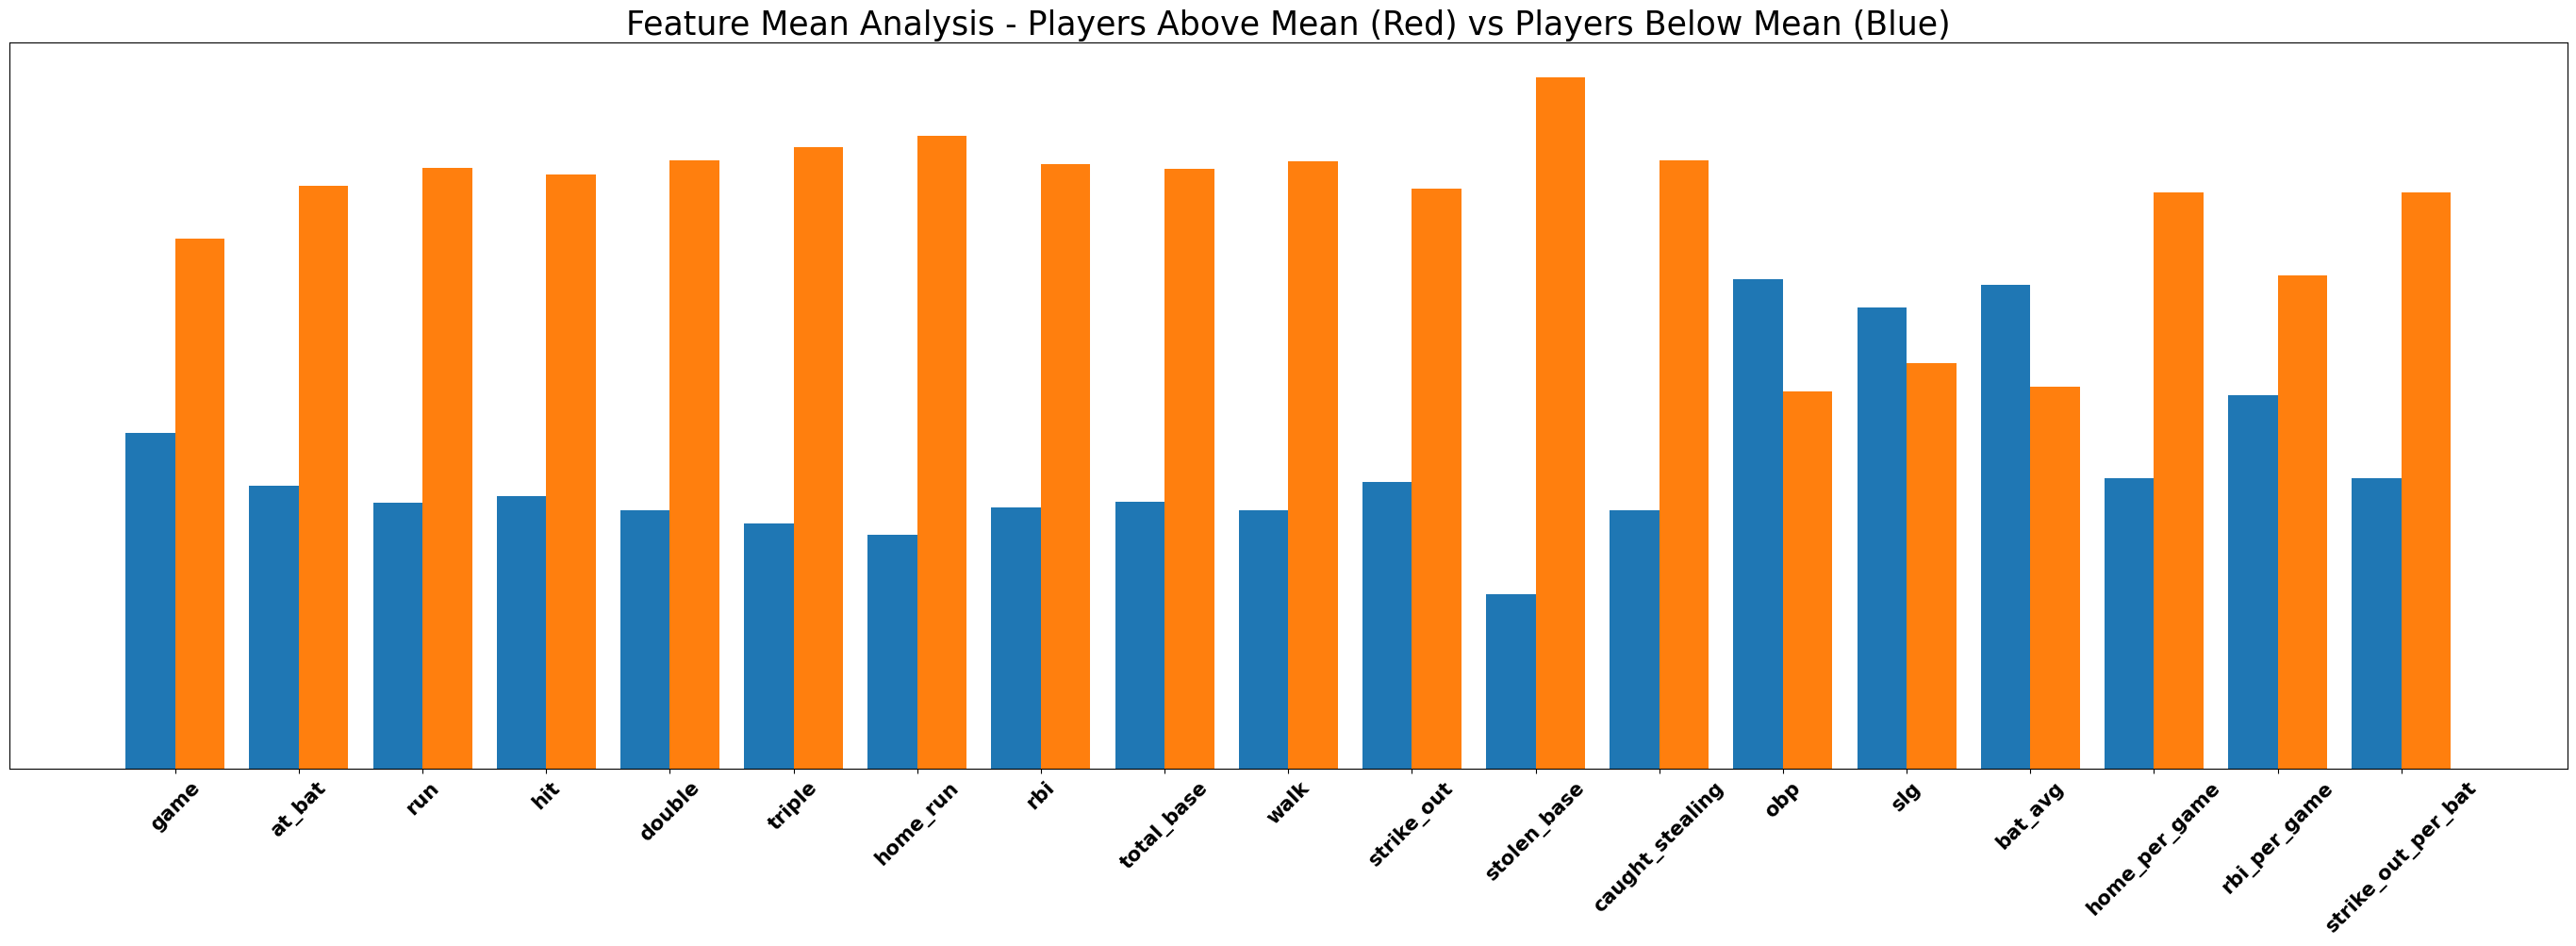

In [52]:
fig, ax = plt.subplots(figsize=(35, 10))
plt.style.use('ggplot')

x_labels = mean_dataframe.index
x = np.arange(len(x_labels))

ax.bar(x - 0.40/2, mean_dataframe["Above"].values, width=0.40)
ax.bar(x + 0.40/2, mean_dataframe["Below"].values, width=0.40)

ax.set_ylabel("")
ax.set_title("Feature Mean Analysis - Players Above Mean (Red) vs Players Below Mean (Blue)", fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=15, 
              color='black', 
              fontweight='bold',
              rotation=45)
ax.yaxis.set_visible(False)

output_folder = "graphs"
filename = "feature-mean-analysis"
full_path = os.path.join(output_folder, filename)
fig.savefig(full_path, dpi=600, bbox_inches="tight")
plt.show()

Analyzing **above-average** players across all teams:

In [53]:
def teams_mean_analysis(database):
    variables = database.columns[3:]
    best_players = {}
    worst_players = {}
    percents_below = {}
    percents_above = {}

    for variable in variables:
        above, below, percent_above, percent_below = mean_analysis(variable, database)
        best_players[variable] = above
        worst_players[variable] = below
        percents_below[variable] = percent_below
        percents_above[variable] = percent_above
    
    return best_players, worst_players, percents_above, percents_below


**New York Yankees**

In [ ]:
teams = dt_baseball["team"].unique()
teams_players = []
teams_variables = {"best_players": [], "worst_players": [], "percents_above": [], "percents_below": []}
team_dict= {}
for team in teams:
    teams_players.append(dt_baseball.loc[dt_baseball["team"] == team])
    teams_variables["best_players"], teams_variables["worst_players"], teams_variables["percents_above"], teams_variables["percents_below"] = teams_mean_analysis(dt_baseball.loc[dt_baseball["team"] == team])
    team_dict[team] = teams_variables

best_worst_nyy = pd.DataFrame({"Above": list(team_dict["NYY"]["percents_above"].values()),
                               "Below": list(team_dict["NYY"]["percents_below"].values())},
                               index=dt_baseball.columns[3:])

best_worst_nyy

,Above,Below
game,37.14,62.86
at_bat,37.14,62.86
run,37.14,62.86
hit,37.14,62.86
double,40.00,60.00
triple,22.86,77.14
home_run,31.43,68.57
rbi,37.14,62.86
total_base,37.14,62.86
walk,37.14,62.86


In [66]:
variables = dt_baseball.columns[3:]

names_players_nyy = []
for i in variables:
    names_players_nyy.append(team_dict["NYY"]["best_players"][i]["name"].values)

best_players_nyy = []
for i in range(0, len(names_players_nyy)-1):
    best_players_nyy = best_players_nyy + list(names_players_nyy[i])

best_players_nyy = list(set(best_players_nyy))

best_players_nyy


['S Choo',
 'J Brown',
 'M Redmond',
 'J Donald',
 'M Grudzielanek',
 'L Carlin',
 'A Hernandez',
 'S Duncan',
 'T Crowe',
 'L Valbuena',
 'C Gimenez',
 'D Sutton',
 'T Hafner',
 'A Cabrera',
 'M LaPorta',
 'A Marte',
 'J Masterson',
 'M Brantley',
 'L Marson',
 'G Sizemore',
 'C Santana',
 'J Nix']

Best offensive players of all the league:

In [56]:
p75_obp = float(dt_baseball.describe()["obp"]["75%"])
p75_slg = float(dt_baseball.describe()["slg"]["75%"])
p75_bat_avg = float(dt_baseball.describe()["bat_avg"]["75%"])
p75_rbi = float(dt_baseball.describe()["rbi"]["75%"])
p75_home_run = float(dt_baseball.describe()["home_per_game"]["75%"])
p25_strike_out = float(dt_baseball.describe()["strike_out_per_bat"]["25%"])
columns_best_offensive = ["obp", "slg", "bat_avg", "rbi", "home_run", "strike_out"]
values_best_offensive = [p75_obp, p75_slg, p75_bat_avg, p75_rbi, p75_home_run, p25_strike_out]

players_offensive = dt_baseball.loc[(dt_baseball["obp"] > p75_obp) & 
                (dt_baseball["slg"] > p75_slg) &
                (dt_baseball["bat_avg"] > p75_bat_avg) &
                (dt_baseball["rbi"] > p75_rbi) &
                (dt_baseball["home_per_game"] > p75_home_run) &
                (dt_baseball["strike_out_per_bat"] < p25_strike_out)].copy()

players_offensive


,name,team,position,game,at_bat,run,hit,double,triple,home_run,...,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg,home_per_game,rbi_per_game,strike_out_per_bat
6,N Markakis,BAL,OF,160,629,79,187,45,3,12,...,73,93,7,2,0.370,0.436,0.297,0.075000,0.375000,0.147854
8,R Cano,NYY,2B,160,626,103,200,41,3,29,...,57,77,3,2,0.381,0.534,0.319,0.181250,0.681250,0.123003
9,B Phillips,CIN,2B,155,626,100,172,33,5,18,...,46,83,16,12,0.332,0.430,0.275,0.116129,0.380645,0.132588
10,R Braun,MIL,OF,157,619,101,188,45,1,25,...,56,105,14,3,0.365,0.501,0.304,0.159236,0.656051,0.169628
15,C McGehee,MIL,3B,157,610,70,174,38,1,23,...,50,102,1,1,0.337,0.464,0.285,0.146497,0.662420,0.167213
16,M Cuddyer,MIN,1B,157,609,93,165,37,5,14,...,58,93,7,3,0.336,0.417,0.271,0.089172,0.515924,0.152709
22,M Prado,ATL,2B,140,599,100,184,40,3,15,...,40,86,5,3,0.350,0.459,0.307,0.107143,0.471429,0.143573
23,M Holliday,STL,OF,158,596,95,186,45,1,28,...,69,93,9,5,0.390,0.532,0.312,0.177215,0.651899,0.156040
24,B Butler,KC,1B,158,595,77,189,45,0,15,...,69,78,0,0,0.388,0.469,0.318,0.094937,0.493671,0.131092
25,V Guerrero,TEX,DH,152,593,83,178,27,1,29,...,35,60,4,5,0.345,0.496,0.300,0.190789,0.756579,0.101180


Choosing just one offensive player as the best

In [57]:
from scipy.stats import shapiro


for i in columns_best_offensive:
    stat, p = shapiro(players_offensive[i])
    print(f'Coluna {i} = {stat:.3f}, p = {p:.3f}')


Coluna obp = 0.953, p = 0.130
Coluna slg = 0.926, p = 0.019
Coluna bat_avg = 0.975, p = 0.581
Coluna rbi = 0.936, p = 0.039
Coluna home_run = 0.928, p = 0.022
Coluna strike_out = 0.948, p = 0.094


In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_extra = players_offensive["strike_out_per_bat"]
players_offensive[columns_best_offensive] = scaler.fit_transform(players_offensive[columns_best_offensive])
players_offensive["strike_out_per_bat"] = 1 - players_offensive["strike_out_per_bat"]
players_offensive["geral_score"] = players_offensive[columns_best_offensive].mean(axis=1)

best_player_offensive = players_offensive.loc[players_offensive["geral_score"].idxmax()]
players_offensive["strike_out_per_bat"] = column_extra
best_player_offensive

name                  A Pujols
team                       STL
position                    1B
game                       159
at_bat                     587
run                        115
hit                        183
double                      39
triple                       1
home_run                   1.0
rbi                        1.0
total_base                 350
walk                       103
strike_out            0.654762
stolen_base                 14
caught_stealing              4
obp                        1.0
slg                        1.0
bat_avg               0.839286
home_per_game         0.264151
rbi_per_game          0.742138
strike_out_per_bat    0.870528
geral_score           0.915675
Name: 35, dtype: object